In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [7]:
conversion_col_cat = ["IsActiveMember","HasCrCard","Exited"]
for col in conversion_col_cat:
    data[col] = data[col].astype("object")

In [8]:
target = "Exited"
cont_columns = data.select_dtypes(["int64","float64"]).columns
cat_columns = [i for i in data.select_dtypes("object") if i!= target]

In [9]:
cont_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [10]:
cat_columns

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [11]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

def t_test_plot(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_resutl = ttest_ind(grp1,grp2)
    print(f"{col} => t-test result => {t_test_resutl}\n")

    
for col in cont_columns:
    grp1 = data.loc[data[target]==0,col]
    grp2 = data.loc[data[target]==1,col]
    t_test_plot(col,grp1,grp2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


CreditScore => t-test result => Ttest_indResult(statistic=2.7100778888729833, pvalue=0.006738213892192373)

Age => t-test result => Ttest_indResult(statistic=-29.76681499437077, pvalue=1.2399313093427738e-186)



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Tenure => t-test result => Ttest_indResult(statistic=1.4000584366735584, pvalue=0.16152684949473256)

Balance => t-test result => Ttest_indResult(statistic=-11.936240300013841, pvalue=1.2755633191525477e-32)

NumOfProducts => t-test result => Ttest_indResult(statistic=4.786984698423093, pvalue=1.717333004804293e-06)



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

EstimatedSalary => t-test result => Ttest_indResult(statistic=-1.2096536380192642, pvalue=0.22644042802223346)



In [12]:
from scipy.stats import chi2_contingency

def chisq_test(target, indepent_col, data):
    two_way = pd.crosstab(data[target],data[indepent_col])
    chi_test_result = chi2_contingency(two_way)
    print(f"{indepent_col} => chi-sq result pvalues => {chi_test_result[1]}\n")

In [13]:
for col in cat_columns:
    chisq_test(target,col,data)

Geography => chi-sq result pvalues => 3.830317605354266e-66

Gender => chi-sq result pvalues => 2.2482100097131755e-26

HasCrCard => chi-sq result pvalues => 0.49237236141554686

IsActiveMember => chi-sq result pvalues => 8.785858269303703e-55



In [14]:
not_realted_col = ["Tenure","EstimatedSalary","HasCrCard"]

In [15]:
data.drop(not_realted_col,axis=1,inplace=True)

In [16]:
data

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0
5,645,Spain,Male,44,113755.78,2,0,1
6,822,France,Male,50,0.00,2,1,0
7,376,Germany,Female,29,115046.74,4,0,1
8,501,France,Male,44,142051.07,2,1,0
9,684,France,Male,27,134603.88,1,1,0


In [17]:
X = data.drop(["Exited"],axis=1)
y = data["Exited"].astype("category")

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
X_train

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
9069,619,Spain,Female,32,175406.13,2,1
2603,643,Germany,Female,34,160426.07,1,1
7738,561,France,Male,33,0.00,2,0
1579,618,Germany,Male,41,37702.79,1,1
5058,714,France,Male,37,148466.93,2,1
5753,760,Spain,Female,41,0.00,2,0
3548,770,Germany,Male,37,141547.26,2,1
409,537,Germany,Female,41,138306.34,1,0
4097,597,Spain,Female,26,0.00,2,0
6461,710,France,Female,36,116085.06,1,0


# Lable encoding

In [20]:
#gender_encoding = {"Male":0,"Female":1}
#X_train["Gender"].apply(lambda x:gender_encoding[x])

In [21]:
#X_train.loc[X_train["Gender"] == "Female" ,"Gender"]=1
#X_train.loc[X_train["Gender"] == "Male" ,"Gender"]=0

In [22]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(X_train["Gender"])
X_train.loc[:,"Gender"] = lb.transform(X_train["Gender"])
X_test.loc[:,"Gender"] = lb.transform(X_test["Gender"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
X_train

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
9069,619,Spain,0,32,175406.13,2,1
2603,643,Germany,0,34,160426.07,1,1
7738,561,France,1,33,0.00,2,0
1579,618,Germany,1,41,37702.79,1,1
5058,714,France,1,37,148466.93,2,1
5753,760,Spain,0,41,0.00,2,0
3548,770,Germany,1,37,141547.26,2,1
409,537,Germany,0,41,138306.34,1,0
4097,597,Spain,0,26,0.00,2,0
6461,710,France,0,36,116085.06,1,0


# dummy variable / one hot encoding / label binarizer

In [24]:
from sklearn.preprocessing import LabelBinarizer
lbb = LabelBinarizer()
lbb.fit(X_train['Geography'])
encoded_tran_df  = pd.DataFrame(lbb.transform(X_train['Geography']),columns=lbb.classes_)
X_train = pd.concat([X_train.reset_index(),encoded_tran_df],axis=1)

X_train.drop(['Geography',"Germany","index"],axis=1,inplace=True)

encoded_test_df  = pd.DataFrame(lbb.transform(X_test['Geography']),columns=lbb.classes_)
X_test = pd.concat([X_test.reset_index(),encoded_test_df],axis=1)
X_test.drop(['Geography',"Germany","index"],axis=1,inplace=True)

In [25]:
X_train

,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,France,Spain
0,619,0,32,175406.13,2,1,0,1
1,643,0,34,160426.07,1,1,0,0
2,561,1,33,0.00,2,0,1,0
3,618,1,41,37702.79,1,1,0,0
4,714,1,37,148466.93,2,1,1,0
5,760,0,41,0.00,2,0,0,1
6,770,1,37,141547.26,2,1,0,0
7,537,0,41,138306.34,1,0,0,0
8,597,0,26,0.00,2,0,0,1
9,710,0,36,116085.06,1,0,1,0


# Standard scaling 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[["CreditScore","Age","Balance"]])
X_train[["CreditScore","Age","Balance"]] = sc.transform(X_train[["CreditScore","Age","Balance"]])
X_test[["CreditScore","Age","Balance"]] = sc.transform(X_test[["CreditScore","Age","Balance"]])

In [27]:
X_train

,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,France,Spain
0,-0.344595,0,-0.656750,1.583725,2,1,0,1
1,-0.095181,0,-0.466380,1.344106,1,1,0,0
2,-0.947345,1,-0.561565,-1.222055,2,0,1,0
3,-0.354987,1,0.199916,-0.618965,1,1,0,0
4,0.642668,1,-0.180824,1.152808,2,1,1,0
5,1.120712,0,0.199916,-1.222055,2,0,0,1
6,1.224634,1,-0.180824,1.042122,2,1,0,0
7,-1.196759,0,0.199916,0.990280,1,0,0,0
8,-0.573224,0,-1.227861,-1.222055,2,0,0,1
9,0.601099,0,-0.276010,0.634831,1,0,1,0


In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
y_proba = model.predict_proba(X_test)

# manual thershold 

In [32]:
import numpy as np
y_pred = np.where(y_proba[:,1]<0.79,0,1)

# Threshold using ROC and checking Algo performance by AUC

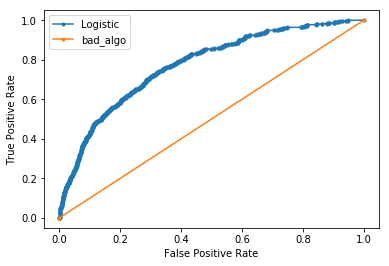

AUC is 0.7743953693413771


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


lr_probs = y_proba[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ns_fpr, ns_tpr, marker='.', label='bad_algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"AUC is {lr_auc}")

# Finding threshold using log loss  (Dont do this method [Just reference instead use ROC & AUC more])

In [34]:
class threshold():
    def __init__(self):
        self.th = 0.5
    
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

In [35]:
from sklearn.metrics import log_loss

In [36]:
different_threhsold = np.linspace(0,1, num = 100)
pre = threshold()
log_losses = []
for t1 in different_threhsold:
    pre.th = t1
    yy = pd.Series(lr_probs)
    y_pred = yy.apply(pre.predict_threshold)
    loss = log_loss(y_test,y_pred)
    log_losses.append(loss)

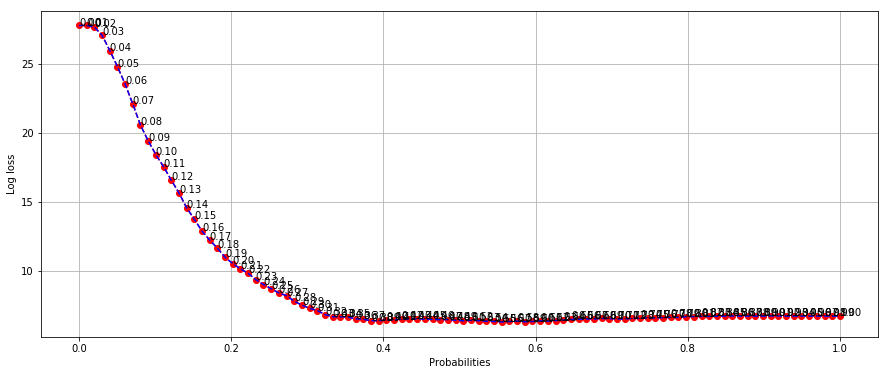

In [37]:
plt.figure( figsize = (15,6))
plt.plot(different_threhsold,log_losses, 'ro--')
plt.plot(different_threhsold,log_losses, 'b--')

for i,p in enumerate(different_threhsold):
    plt.text(different_threhsold[i],log_losses[i],'%0.2f'%(p))

plt.xlabel('Probabilities')
plt.ylabel('Log loss')
plt.grid()
plt.show()

In [38]:
ind = np.array(log_losses).argmin()
different_threhsold[ind]

0.5555555555555556

In [39]:
p = 0.5555555555555556
oddratio = p/(1-p)
lnor = np.log(oddratio)
1-lnor

0.7768564486857901

In [40]:
import numpy as np
y_pred = np.where(y_proba[:,1]<0.7768564486857901,0,1)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2411,    5],
       [ 570,   14]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8083333333333333

In [43]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7368421052631579

In [44]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.023972602739726026

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.04643449419568823

# Naiive bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8366666666666667

In [48]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7117117117117117

In [49]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.2705479452054795

In [50]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.39205955334987597